# KiCad Rectangular Helix Coil Generator

This notebook demonstrates how to generate a rectangular helix coil pattern using the `draw_helix_rectangle` function from the KiCad-draw package. The function creates a rectangular coil with rounded corners across multiple PCB layers, connected by vias.

In [1]:
import subprocess
import sys

try:
    from kicad_draw.models import HelixRectangleParams
    from kicad_draw.PCBmodule import PCBdraw

    print("✓ kicad-draw is already installed")
except ImportError:
    print("Installing kicad-draw...")

    # Check if running in Colab
    IN_COLAB = "google.colab" in sys.modules

    if IN_COLAB:
        # Install and force runtime restart in Colab
        from google.colab import runtime

        subprocess.check_call([sys.executable, "-m", "pip", "install", "kicad-draw"])
        runtime.restart()
    else:
        # Local installation
        subprocess.check_call([sys.executable, "-m", "pip", "install", "kicad-draw"])
        print(
            "\n✓ Installation complete. Please restart your notebook kernel and run all cells."
        )

✓ kicad-draw is already installed


In [2]:
# Verify the imports worked
from kicad_draw.config import default_layers

print("KiCad-draw version:", PCBdraw.__module__)
print("Available stackups:", list(default_layers.keys()))

# Create a test instance to verify initialization works
test_draw = PCBdraw(stackup="default_4layer")
print("\nSuccessfully created PCBdraw instance with 4-layer stackup")

KiCad-draw version: kicad_draw.PCBmodule
Available stackups: ['default_4layer', 'default_6layer']

Successfully created PCBdraw instance with 4-layer stackup


In [3]:
# Create a new PCBdraw instance with visualization enabled
print("🎨 Creating visualization...")

# Create the same parameters as before
params = HelixRectangleParams(
    x0=150.0,  # Center X coordinate
    y0=100.0,  # Center Y coordinate
    width=30.0,  # Rectangle width
    height=20.0,  # Rectangle height
    corner_radius=3.0,  # Radius of rounded corners
    layer_index_list=[0, 1, 2, 3, 4, 5],  # Use 6 layers
    track_width=0.5,  # Main trace width
    connect_width=0.3,  # Connection trace width
    drill_size=0.2,  # Via drill size
    via_size=0.4,  # Via pad size
    net_number=1,  # KiCad net number
    port_gap=2.0,  # Port gap size (creates openings on right side)
    tab_gap=3.0,  # Tab extension distance
)

# Create PCBdraw with visualization enabled
kicad_draw_viz = PCBdraw(stackup="default_6layer", mode="file")
kicad_draw_viz.enable_visualization(width=1000, height=600)

# Draw the rectangular helix coil
kicad_draw_viz.draw_helix_rectangle(params)

print("✅ Rectangular helix coil generated with visualization!")

🎨 Creating visualization...
✅ Rectangular helix coil generated with visualization!


📊 Displaying PCB visualization...
Each color represents a different PCB layer:
🟡 F.Cu (Top copper) - Gold
🔴 In1.Cu (Inner layer 1) - Red
🟢 In2.Cu (Inner layer 2) - Green
🔵 In3.Cu (Inner layer 3) - Blue
🟣 In4.Cu (Inner layer 4) - Magenta
🔷 B.Cu (Bottom copper) - Teal
⚫ Vias - Dark gray circles



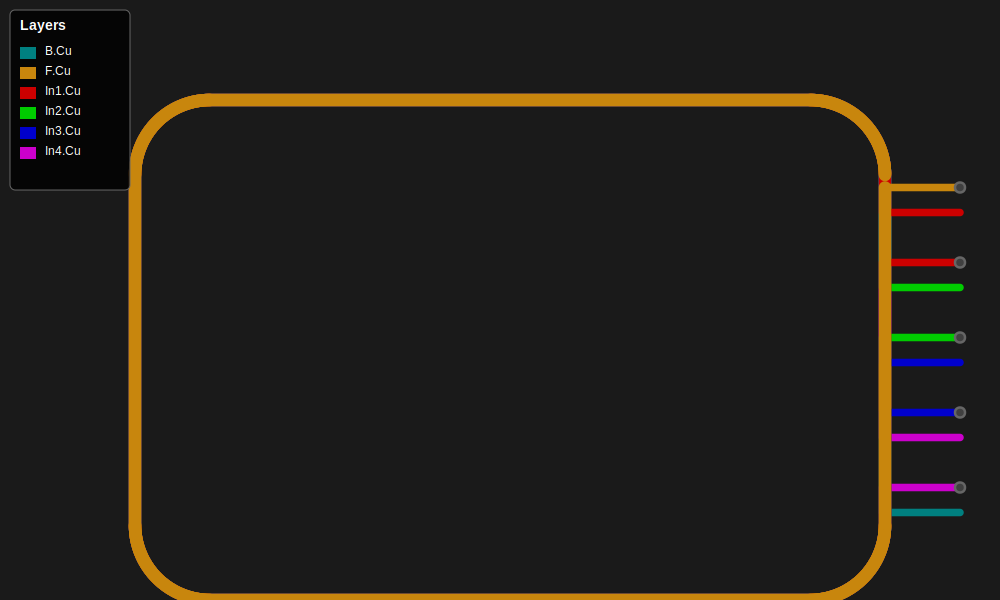

In [4]:
# Display the SVG visualization
print("📊 Displaying PCB visualization...")
print("Each color represents a different PCB layer:")
print("🟡 F.Cu (Top copper) - Gold")
print("🔴 In1.Cu (Inner layer 1) - Red")
print("🟢 In2.Cu (Inner layer 2) - Green")
print("🔵 In3.Cu (Inner layer 3) - Blue")
print("🟣 In4.Cu (Inner layer 4) - Magenta")
print("🔷 B.Cu (Bottom copper) - Teal")
print("⚫ Vias - Dark gray circles")
print()

# Show the visualization
kicad_draw_viz.show_svg()

In [5]:
# Save the visualization to a file for sharing
svg_filename = "rectangular_helix_coil.svg"
kicad_draw_viz.save_svg(svg_filename)

print(f"💾 Visualization saved as '{svg_filename}'")
print("You can open this file in any web browser or vector graphics editor!")

# Print some statistics about the generated coil
print(f"\n📈 Coil Statistics:")
print(f"- Total KiCad elements: {len(kicad_draw_viz.elements)}")
segments = sum(1 for e in kicad_draw_viz.elements if "(segment" in e)
vias = sum(1 for e in kicad_draw_viz.elements if "(via" in e)
print(f"- Segments (traces): {segments}")
print(f"- Vias (layer connections): {vias}")
print(f"- Layers used: {len(params.layer_index_list)}")
print(f"- Rectangle dimensions: {params.width} × {params.height} mm")
print(f"- Corner radius: {params.corner_radius} mm")

SVG saved to rectangular_helix_coil.svg
💾 Visualization saved as 'rectangular_helix_coil.svg'
You can open this file in any web browser or vector graphics editor!

📈 Coil Statistics:
- Total KiCad elements: 2443
- Segments (traces): 2438
- Vias (layer connections): 5
- Layers used: 6
- Rectangle dimensions: 30.0 × 20.0 mm
- Corner radius: 3.0 mm


In [6]:
# Create three different coil designs for comparison
designs = [
    {
        "name": "Compact Coil (4 layers)",
        "params": HelixRectangleParams(
            x0=75.0,
            y0=50.0,
            width=20.0,
            height=15.0,
            corner_radius=2.0,
            layer_index_list=[0, 1, 2, 3],
            track_width=0.3,
            connect_width=0.2,
            drill_size=0.15,
            via_size=0.3,
            net_number=1,
            port_gap=1.5,
            tab_gap=2.0,
        ),
    },
    {
        "name": "Standard Coil (6 layers)",
        "params": HelixRectangleParams(
            x0=150.0,
            y0=50.0,
            width=30.0,
            height=20.0,
            corner_radius=3.0,
            layer_index_list=[0, 1, 2, 3, 4, 5],
            track_width=0.5,
            connect_width=0.3,
            drill_size=0.2,
            via_size=0.4,
            net_number=1,
            port_gap=2.0,
            tab_gap=3.0,
        ),
    },
    {
        "name": "Large Coil (4 layers)",
        "params": HelixRectangleParams(
            x0=225.0,
            y0=50.0,
            width=40.0,
            height=25.0,
            corner_radius=5.0,
            layer_index_list=[0, 1, 2, 3],
            track_width=0.8,
            connect_width=0.5,
            drill_size=0.3,
            via_size=0.6,
            net_number=1,
            port_gap=3.0,
            tab_gap=4.0,
        ),
    },
]

# Create a single visualization with all three designs
comparison_draw = PCBdraw(stackup="default_6layer", mode="file")
comparison_draw.enable_visualization(width=1200, height=400)

print("🔄 Generating comparison designs...")
for design in designs:
    print(f"  - {design['name']}")
    comparison_draw.draw_helix_rectangle(design["params"])

print("✅ All designs generated!")

🔄 Generating comparison designs...
  - Compact Coil (4 layers)
  - Standard Coil (6 layers)
  - Large Coil (4 layers)
✅ All designs generated!


📊 Comparison of different coil designs:


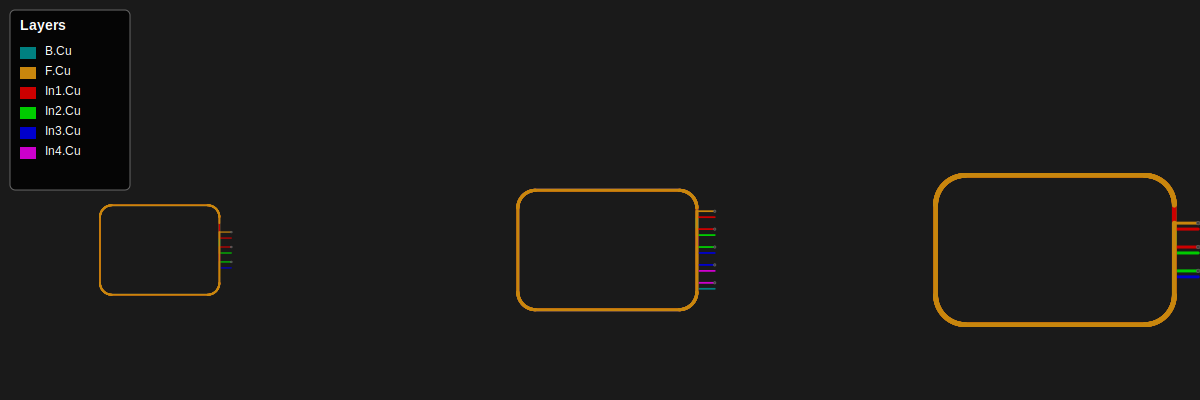

SVG saved to coil_comparison.svg

💾 Comparison saved as 'coil_comparison.svg'


In [7]:
# Display the comparison visualization
print("📊 Comparison of different coil designs:")
comparison_draw.show_svg()

# Save the comparison
comparison_draw.save_svg("coil_comparison.svg")
print("\n💾 Comparison saved as 'coil_comparison.svg'")

In [8]:
try:
    # Create parameters for a rectangular helix coil with ports
    params = HelixRectangleParams(
        x0=150.0,  # Center X coordinate
        y0=100.0,  # Center Y coordinate
        width=30.0,  # Rectangle width
        height=20.0,  # Rectangle height
        corner_radius=3.0,  # Radius of rounded corners
        layer_index_list=[0, 1, 2, 3, 4, 5],  # Use 6 layers
        track_width=0.5,  # Main trace width
        connect_width=0.3,  # Connection trace width
        drill_size=0.2,  # Via drill size
        via_size=0.4,  # Via pad size
        net_number=1,  # KiCad net number
        port_gap=2.0,  # Port gap size (creates openings on right side)
        tab_gap=3.0,  # Tab extension distance
    )
    print("Parameters validated successfully")

    # Create PCBdraw instance with 6-layer stackup
    kicad_draw = PCBdraw(
        stackup="default_6layer", mode="file"
    )  # Use file mode to count segments

    # Draw the rectangular helix coil with ports
    kicad_draw.draw_helix_rectangle(params)

    # Print statistics
    print(f"\nGenerated {len(kicad_draw.elements)} KiCad elements:")
    segments = sum(1 for e in kicad_draw.elements if "(segment" in e)
    vias = sum(1 for e in kicad_draw.elements if "(via" in e)
    print(f"- {segments} segments")
    print(f"- {vias} vias")
    print("\nThis version includes ports (gaps) on the right side with connection tabs")
    print(
        "extending outward for layer-to-layer connections, similar to the helix coil design."
    )

    # Switch back to print mode and draw again to display the elements
    kicad_draw.set_mode("print")
    kicad_draw.draw_helix_rectangle(params)

except Exception as e:
    print("Error:", str(e))

Parameters validated successfully

Generated 2443 KiCad elements:
- 2438 segments
- 5 vias

This version includes ports (gaps) on the right side with connection tabs
extending outward for layer-to-layer connections, similar to the helix coil design.
(segment (start 138.0 90.0) (end 162.0 90.0) (width 0.5) (layer "F.Cu") (net 1) (tstamp 0))
(segment (start 165.0 93.5) (end 165.0 107.0) (width 0.5) (layer "F.Cu") (net 1) (tstamp 0))
(segment (start 162.0 110.0) (end 138.0 110.0) (width 0.5) (layer "F.Cu") (net 1) (tstamp 0))
(segment (start 135.0 107.0) (end 135.0 93.0) (width 0.5) (layer "F.Cu") (net 1) (tstamp 0))
(segment (start 135.0 93.0) (end 135.00037010255502 92.95287804806453) (width 0.5) (layer "F.Cu") (net 1) (tstamp 0))
(segment (start 135.00037010255502 92.95287804806453) (end 135.0014803189028 92.90576772276562) (width 0.5) (layer "F.Cu") (net 1) (tstamp 0))
(segment (start 135.0014803189028 92.90576772276562) (end 135.0033303751141 92.85868064787107) (width 0.5) (layer "F.